In [673]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [674]:
dataset = pd.read_csv("Loan_Data.csv")
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [675]:
dataset.shape

(614, 13)

In [676]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [677]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


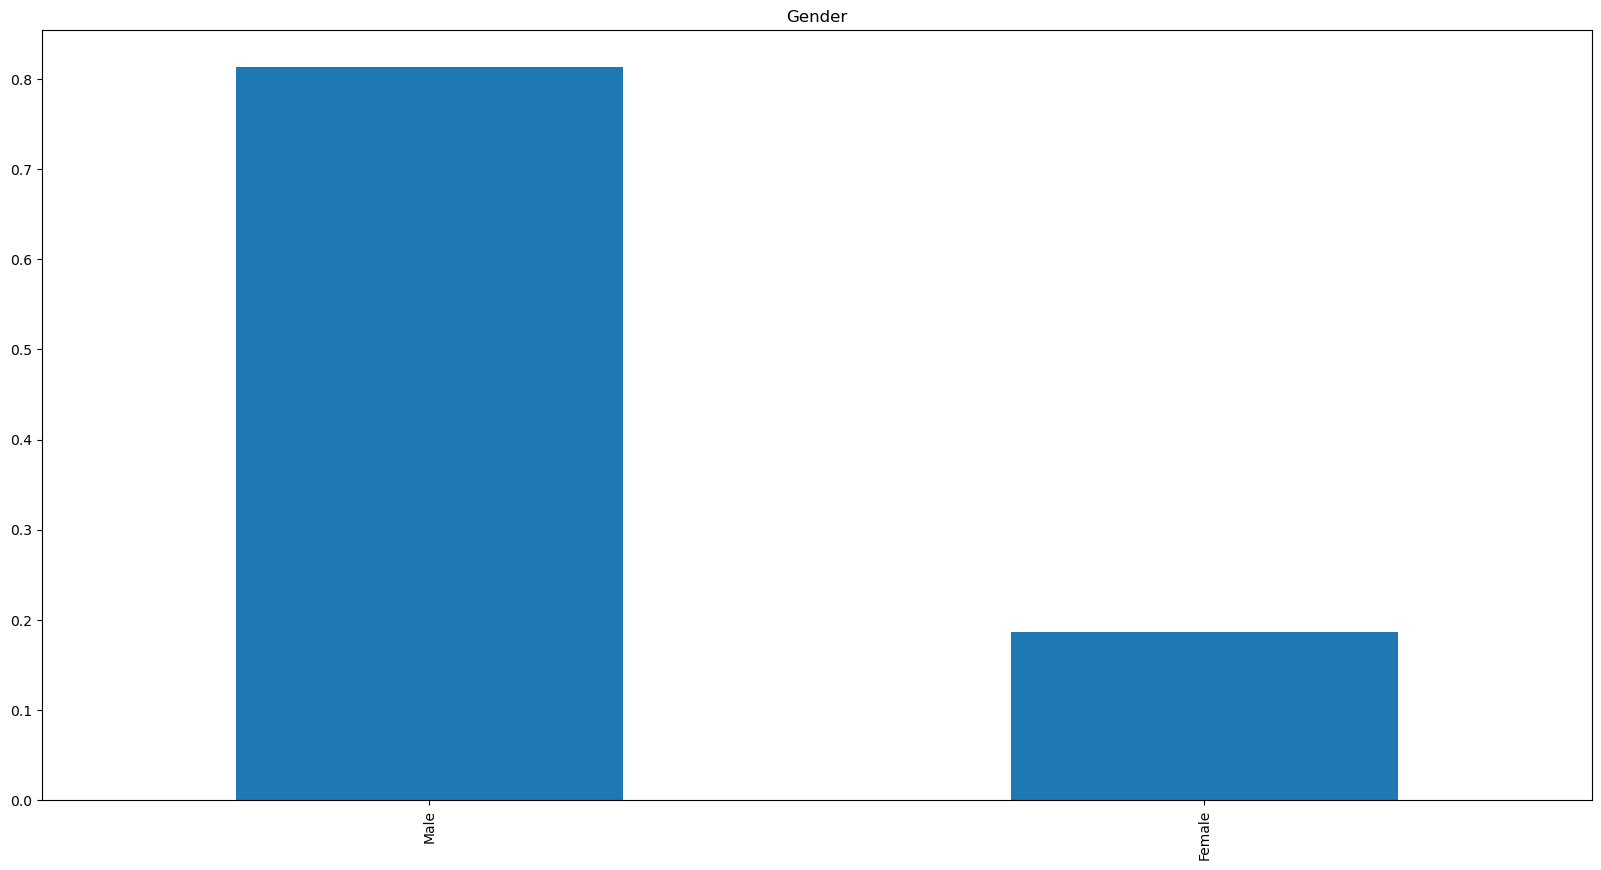

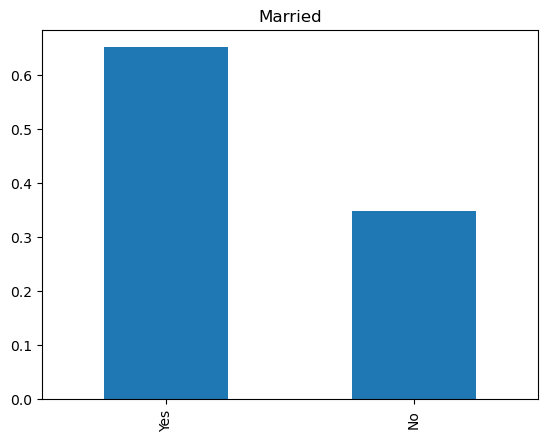

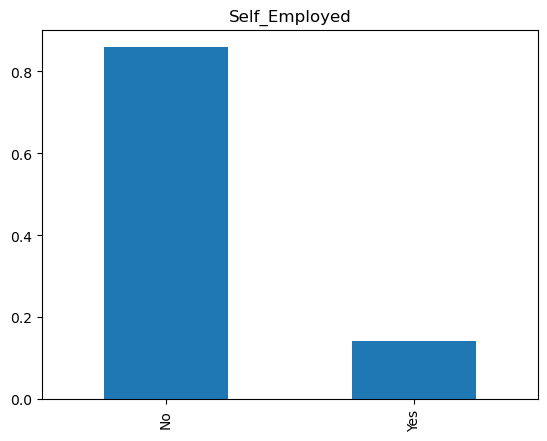

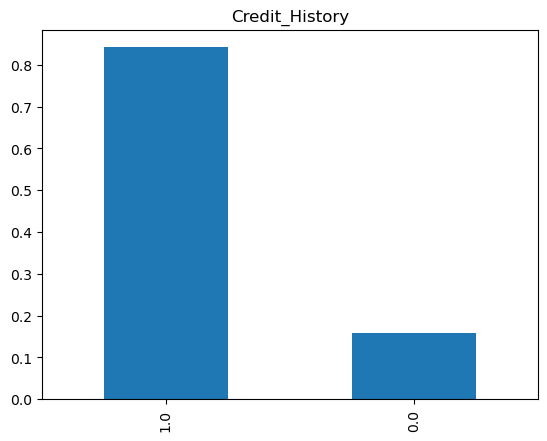

In [678]:
dataset['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender')
plt.show()
dataset['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
dataset['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
dataset['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

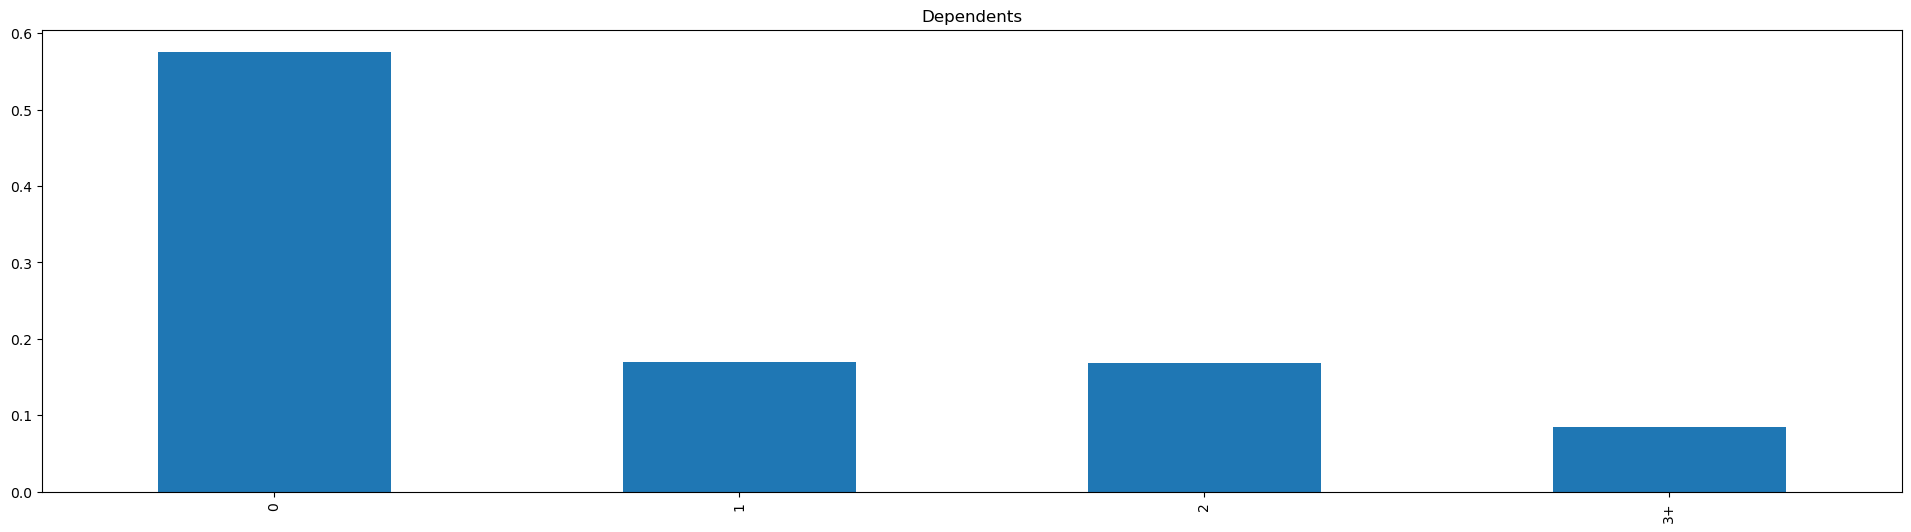

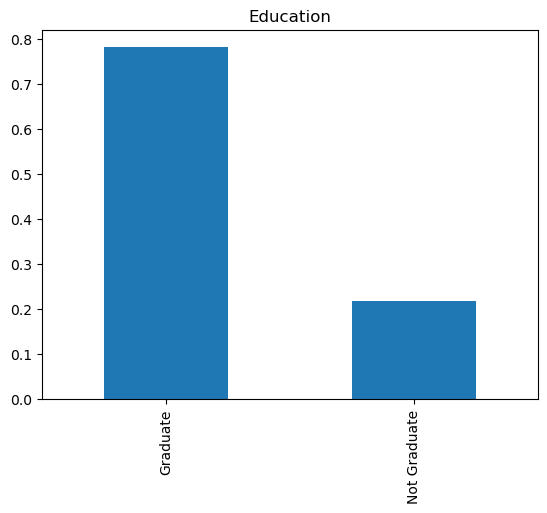

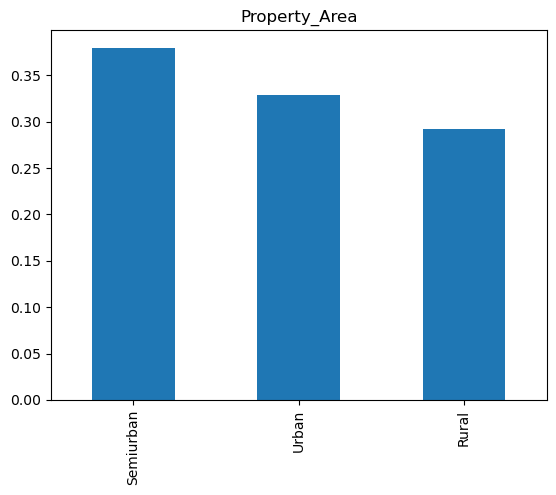

In [679]:
dataset['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.show()
dataset['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
dataset['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

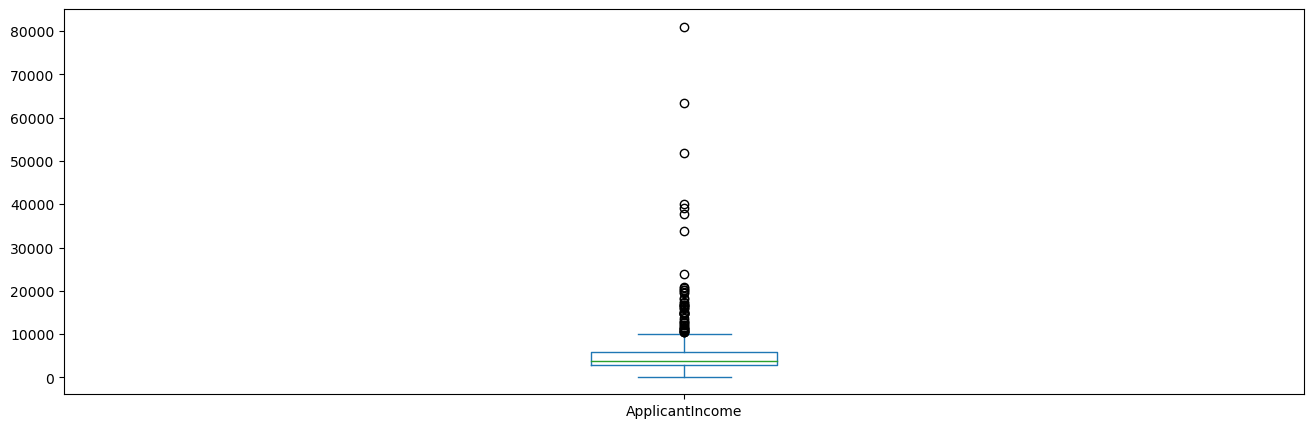

In [680]:
dataset['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

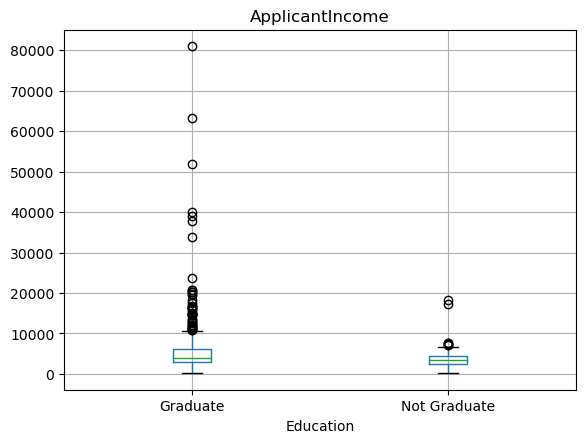

In [681]:
dataset.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

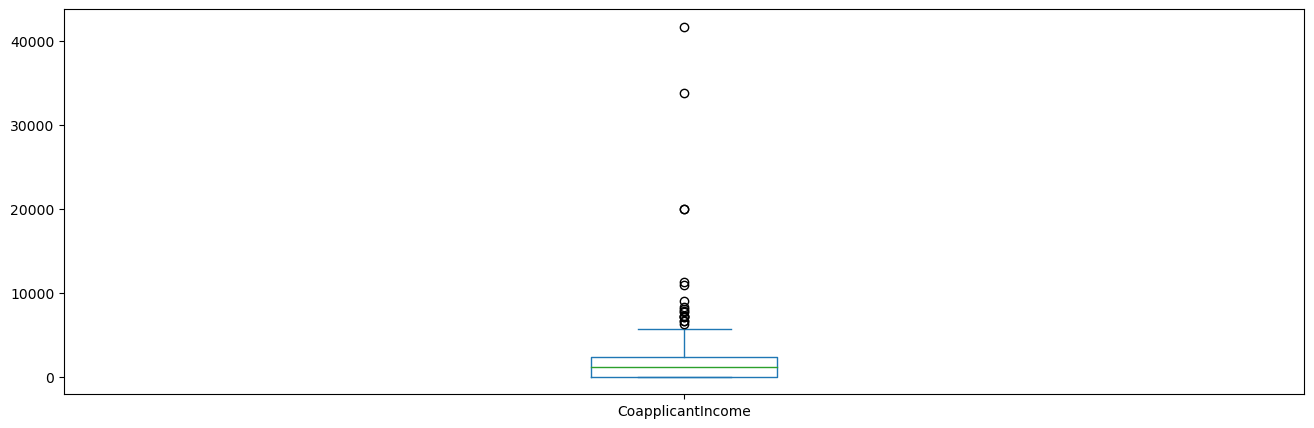

In [682]:
dataset['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

C:\Users\Subash\AppData\Local\Temp\ipykernel_14848\2028780127.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = dataset.corr()


<Axes: >

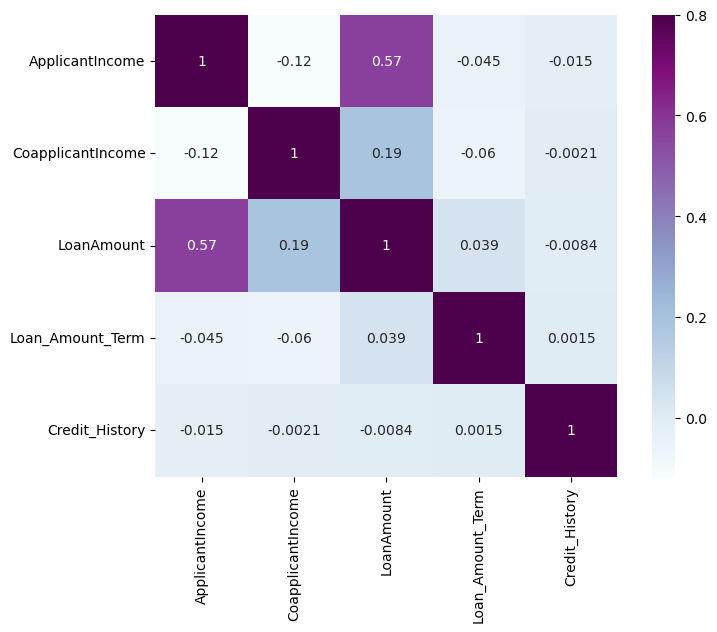

In [683]:
matrix = dataset.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

In [684]:
dataset.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [685]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0], inplace=True)
dataset['Married'].fillna(dataset['Married'].mode()[0], inplace=True)
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0], inplace=True)
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0], inplace=True)
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0], inplace=True)
dataset['Loan_Amount_Term'].fillna((dataset['Loan_Amount_Term'].mode()[0]), inplace=True)

In [686]:
dataset['LoanAmount'].fillna((dataset['LoanAmount'].mean()), inplace=True)  

In [687]:
dataset['LoanAmount'] = (dataset['LoanAmount'])

In [688]:
dataset['Total_Income'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome']
dataset['Total_Income'] = (dataset['Total_Income'])

In [689]:
dataset.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

In [690]:
X = dataset.iloc[: , np.r_[1:6, 8:12, 13]].values
y = dataset.iloc[: , -2].values

In [691]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [692]:
print(X_train[0])

['Male' 'Yes' '1' 'Graduate' 'No' 104.0 360.0 1.0 'Semiurban' 4545.0]


In [693]:
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()

for i in np.r_[0:5, 8]:
    X_train[: , i] = labelencoder_X.fit_transform(X_train[: , i])
    X_test[: , i] = labelencoder_X.transform(X_test[: , i])

In [694]:
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)
y_test = labelencoder_y.transform(y_test)

In [695]:
print(X_train[0])

[1 1 1 0 0 104.0 360.0 1.0 1 4545.0]


In [696]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [697]:
print(X_train)

[[ 0.48018376  0.74087509  0.24061477 ...  0.40094451 -0.04158637
  -0.37073993]
 [ 0.48018376  0.74087509  0.24061477 ...  0.40094451 -1.317768
   0.03495607]
 [-2.08253608 -1.34975519  1.23340345 ...  0.40094451  1.23459527
  -0.53639665]
 ...
 [ 0.48018376  0.74087509  1.23340345 ...  0.40094451 -1.317768
   0.01154483]
 [-2.08253608 -1.34975519  0.24061477 ...  0.40094451 -1.317768
  -0.36170141]
 [ 0.48018376  0.74087509 -0.75217391 ...  0.40094451 -0.04158637
  -0.35325558]]


In [698]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [699]:
y_pred = classifier.predict(X_test)

In [700]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[20 12]
 [ 2 89]]


0.8861788617886179

## Applying k-Fold Cross Validation

In [701]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 77.80 %
Standard Deviation: 4.20 %


## Applying Grid Search to find the best model and the best parameters

In [702]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 78.82 %
Best Parameters: {'C': 0.25, 'kernel': 'linear'}


In [703]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear',C=0.25, random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=0.25, kernel='linear', random_state=0)

In [704]:
y_pred = classifier.predict(X_test)

In [705]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[20 12]
 [ 1 90]]


0.8943089430894309